In [23]:
import cv2
from google.colab.patches import cv2_imshow


In [19]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/haarcascade_eye.xml')

In [20]:
def detect(gray,frame):
  faces=face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray,1.1,3)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  return frame
  



In [21]:
video_capture = cv2.VideoCapture('/content/head-pose-face-detection-male.mp4')



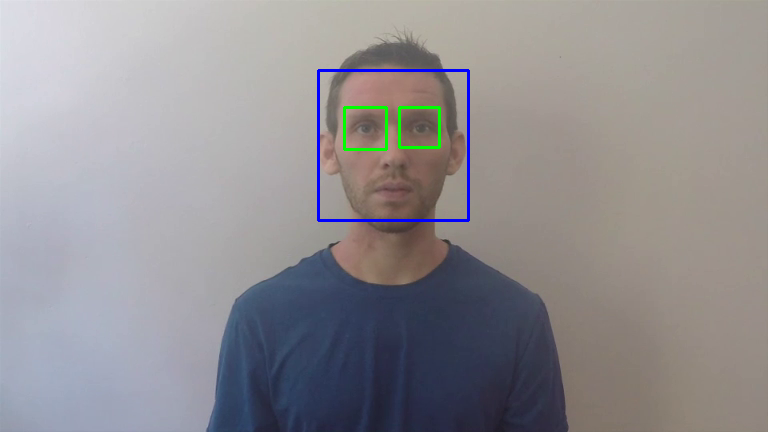

error: ignored

In [26]:
while True:
  _,frame=video_capture.read()
  gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  canvas=detect(gray,frame)
  cv2_imshow(canvas)
  if cv2.waitKey(1) & 0xFF==ord('q'):
    break
  video_capture.release()
  cv2.destroyAllWindows()